<a href="https://colab.research.google.com/github/b62mp1/dataset/blob/main/stock_price_prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Price Prediction of Microsoft

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM,Dense,Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model


# Reading data using parse date
As it is timeseries data so we have to read the data by parsing date means making data column as index.

In [3]:

df_final = pd.read_csv("MSFT.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

In [4]:
df_final.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,0.605903,0.616319,0.598090,0.616319,0.447268,53033600
1990-01-03,0.621528,0.626736,0.614583,0.619792,0.449788,113772800
1990-01-04,0.619792,0.638889,0.616319,0.638021,0.463017,125740800
1990-01-05,0.635417,0.638889,0.621528,0.622396,0.451678,69564800
1990-01-08,0.621528,0.631944,0.614583,0.631944,0.458607,58982400


In [5]:

df_final.shape

(7334, 6)

In [6]:
df_final.describe()

,Open,High,Low,Close,Adj Close,Volume
count,7334.000000,7334.000000,7334.000000,7334.000000,7334.000000,7.334000e+03
mean,28.578362,28.891892,28.261203,28.582426,24.008891,6.022760e+07
std,22.279033,22.476021,22.054379,22.275692,21.941225,3.400345e+07
min,0.591146,0.604167,0.583333,0.598090,0.434039,3.705600e+06
25%,12.457031,12.595703,12.261719,12.488281,9.062849,3.821840e+07
50%,26.980000,27.235000,26.730000,26.990000,20.431164,5.429885e+07
75%,34.716562,35.099998,34.250000,34.687500,26.993589,7.367888e+07
max,115.419998,116.180000,114.930000,115.610001,115.112709,7.645040e+08


In [7]:
df_final.isnull().values.any()

False

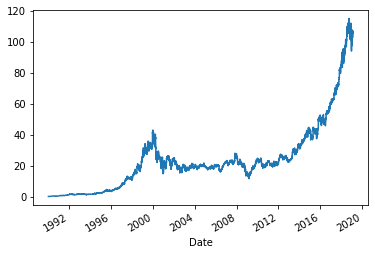

In [8]:
df_final['Adj Close'].plot()

**Correlation Analys** 


In [9]:
X=df_final.drop(['Adj Close'],axis=1)
X=X.drop(['Close'],axis=1)

In [33]:
X.head()

,Open,High,Low,Volume
Date,,,,
1990-01-02,0.605903,0.616319,0.598090,53033600
1990-01-03,0.621528,0.626736,0.614583,113772800
1990-01-04,0.619792,0.638889,0.616319,125740800
1990-01-05,0.635417,0.638889,0.621528,69564800
1990-01-08,0.621528,0.631944,0.614583,58982400


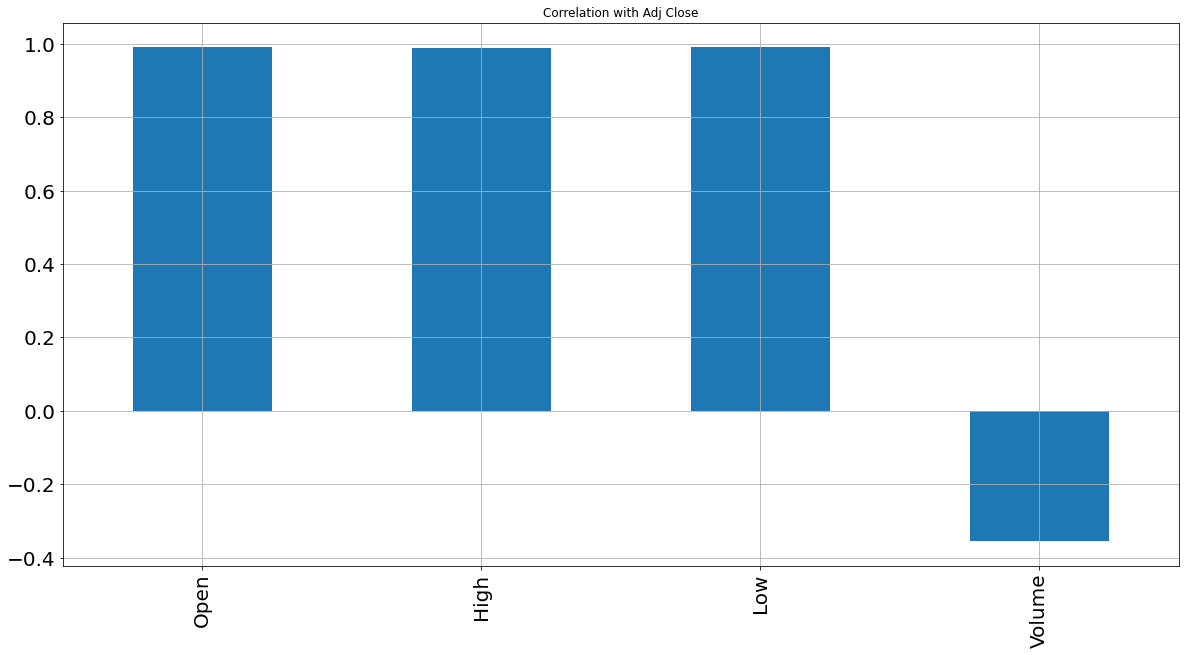

In [10]:
X.corrwith(df_final['Adj Close']).plot.bar(
        figsize = (20, 10), title = "Correlation with Adj Close", fontsize = 20,
        rot = 90, grid = True)

In [11]:
test = df_final
# Target column
target_adj_close = pd.DataFrame(test['Adj Close'])
display(test.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,0.605903,0.616319,0.598090,0.616319,0.447268,53033600
1990-01-03,0.621528,0.626736,0.614583,0.619792,0.449788,113772800
1990-01-04,0.619792,0.638889,0.616319,0.638021,0.463017,125740800
1990-01-05,0.635417,0.638889,0.621528,0.622396,0.451678,69564800
1990-01-08,0.621528,0.631944,0.614583,0.631944,0.458607,58982400


In [34]:
target_adj_close

,Adj Close
Date,
1990-01-02,0.449788
1990-01-03,0.463017
1990-01-04,0.451678
1990-01-05,0.458607
1990-01-08,0.457347
...,...
2018-09-24,113.957695
2018-09-25,113.489723
2018-09-26,113.917870


In [12]:
# selecting Feature Columns
feature_columns = ['Open', 'High', 'Low', 'Volume']

# Normalizing the data

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,Open,High,Low,Volume
Date,,,,
1990-01-02,0.000129,0.000105,0.000129,0.064837
1990-01-03,0.000265,0.000195,0.000273,0.144673
1990-01-04,0.000249,0.000300,0.000288,0.160404
1990-01-05,0.000386,0.000300,0.000334,0.086566
1990-01-08,0.000265,0.000240,0.000273,0.072656


In [14]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value


target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

,Open,High,Low,Volume
Date,,,,
1990-01-02,0.000129,0.000105,0.000129,0.064837
1990-01-03,0.000265,0.000195,0.000273,0.144673
1990-01-04,0.000249,0.000300,0.000288,0.160404
1990-01-05,0.000386,0.000300,0.000334,0.086566
1990-01-08,0.000265,0.000240,0.000273,0.072656


Shape of features :  (7334, 4)
Shape of target :  (7334, 1)


,Open,High,Low,Volume
Date,,,,
2019-02-01,0.898632,0.895480,0.889984,0.041838
2019-02-04,0.890707,0.910189,0.893657,0.036290
2019-02-05,0.918487,0.922908,0.921554,0.031046
2019-02-06,0.926673,0.920572,0.917794,0.022219
2019-02-07,0.910911,0.908372,0.906950,0.034247


,Adj Close
Date,
2019-02-01,105.739998
2019-02-04,107.220001
2019-02-05,106.029999
2019-02-06,105.269997
2019-02-07,105.669998



 -----After process------ 

Shape of features :  (7244, 4)
Shape of target :  (7244, 1)


,Adj Close
Date,
2018-09-24,113.957695
2018-09-25,113.489723
2018-09-26,113.917870
2018-09-27,113.878044
2018-09-28,115.112709


# Train test Split using Timeseriessplit

In [15]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [16]:

X_train.shape

(6586, 4)

In [17]:
X_test.shape

(658, 4)

In [18]:
y_train.shape

(6586,)

In [19]:
y_test.shape

(658,)

In [20]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

# Benchmark Model

RMSE:  64.27218093927979
R2 score:  -304.87987628496893


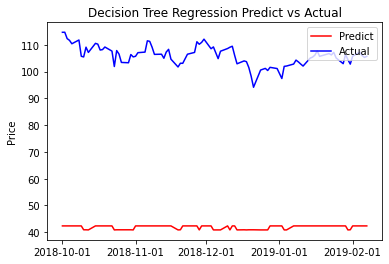

In [21]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train, y_train)

validate_result(benchmark_dt, 'Decision Tree Regression')

# Process the data for LSTM

In [22]:
X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Model building : LSTM

In [24]:

from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/200
824/824 [==============================] - 3s 2ms/step - loss: 172.9290
Epoch 2/200
824/824 [==============================] - 2s 2ms/step - loss: 33.5423
Epoch 3/200
824/824 [==============================] - 2s 2ms/step - loss: 31.9123
Epoch 4/200
824/824 [==============================] - 2s 2ms/step - loss: 19.8921
Epoch 5/200
824/824 [==============================] - 2s 2ms/step - loss: 9.3363
Epoch 6/200
824/824 [==============================] - 2s 2ms/step - loss: 3.5276
Epoch 7/200
824/824 [==============================] - 2s 2ms/step - loss: 1.6759
Epoch 8/200
824/824 [==============================] - 2s 2ms/step - loss: 1.2756
Epoch 9/200
824/824 [==============================] - 2s 2ms/step - loss: 1.1408
Epoch 10/200
824/824 [==============================] - 2s 2ms/step - loss: 1.0598
Epoch 11/200
824/824 [==============================] - 2s 2ms/step - loss: 1.0068
Epoch 12/200
824/824 [==============================] - 2s 2ms/step - loss: 0.9732
Epoch 13

# Evaluation of Model

In [25]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)


The R2 score on the Train set is:	0.876
The R2 score on the Test set is:	0.784


## Predictions made by LSTM

In [26]:
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)

658/658 [==============================] - 1s 1ms/step - loss: 77.6847


In [27]:
print('LSTM: %f'%score_lstm)

LSTM: 77.684662


In [28]:
y_pred_test_LSTM = model_lstm.predict(X_tst_t)

# LSTM's Prediction Visual

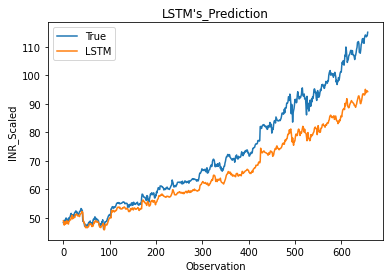

In [29]:
plt.plot(y_test, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()


# Converting Prediction data
In this step I have made the prediction of test data and will convert the dataframe to csv so that we can see the price difference between actual and predicted price.

In [30]:
col1 = pd.DataFrame(y_test, columns=['True'])

col2 = pd.DataFrame(y_pred_test_LSTM, columns=['LSTM_prediction'])

col3 = pd.DataFrame(history_model_lstm.history['loss'], columns=['Loss_LSTM'])
results = pd.concat([col1, col2, col3], axis=1)
results.to_excel('PredictionResults_LSTM_NonShift.xlsx')

# Conclusion

It is impossible to  get a model that can 99% predict the price without any error, there are too many factors can affect the
stock prices. So, we cannot hope there is a perfect model, but the general trend of predicted price is in line with the actual data, so the trader could have an indicator to reference, and makes trading decision by himself.


Further, we can improve the model's accuracy by increasing the epochs, trying out different activation functions or even change the model's structure. As exact 